In [7]:
import pandas as pd
import statistics
# If you want to do the statistics with your own run of the benchmarks
df = pd.read_csv('../results/stats.csv')
# otherwise do this 
# df = pd.read_csv('../computed/stats.csv')
df = df.fillna(0)
nv = df.groupby('filename').max('nb_vulns')
# Here we compute we group by options and nb of vulsn and we print the mean times taken by the analysis
df.groupby(['options']).mean('time')['time']
tmp = df
tmp['result']= df['result'].map(lambda x: 1 if x  == "TRUE" else (0 if x == "UNKNOWN" else -1))
df['result'].map(lambda x: 1 if x  == "TRUE" else (0 if x == "UNKNOWN" else -1))
df = df.query("filename != 'toy.c'")



In [8]:
df.query("result== -1").groupby('filename').max('time')

,result,loc,time,alarms
filename,,,,
trm_svcomp_Lcm_false-termination-inputrand.c,-1,23,120.020,0
trm_svcomp_Lcm_false-termination-randinput.c,-1,23,120.019,0


In [9]:
mx=df.query("result==1").groupby('filename').max('time')
avg=df.query("result==1").groupby('filename').mean('time')
print(sum(mx['time']))
print(statistics.mean(avg['time']))

105.15700000000004
0.5031092342342343


In [10]:
df.groupby(['options']).mean('time')['time']


options
-domain boxes -ordinals 3  -refine -resilience                   0.095361
-domain boxes -ordinals 3 -refine                                0.036588
-domain boxes -refine                                            0.039487
-domain boxes -refine -resilience                                0.060731
-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience    1.250966
-domain polyhedra -joinbwd 5 -ordinals 3 -refine                 1.388714
-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience    2.363387
-domain polyhedra -joinbwd 8 -ordinals 3 -refine                 2.810218
-domain polyhedra -ordinals 3  -refine -resilience               0.091739
-domain polyhedra -ordinals 3 -refine                            0.128714
-domain polyhedra -refine                                        0.112319
-domain polyhedra -refine -resilience                            0.075807
Name: time, dtype: float64

In [11]:
df.groupby(['options']).sum('time')['time']


options
-domain boxes -ordinals 3  -refine -resilience                    11.348
-domain boxes -ordinals 3 -refine                                  4.354
-domain boxes -refine                                              4.699
-domain boxes -refine -resilience                                  7.227
-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience    148.865
-domain polyhedra -joinbwd 5 -ordinals 3 -refine                 165.257
-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience    281.243
-domain polyhedra -joinbwd 8 -ordinals 3 -refine                 334.416
-domain polyhedra -ordinals 3  -refine -resilience                10.917
-domain polyhedra -ordinals 3 -refine                             15.317
-domain polyhedra -refine                                         13.366
-domain polyhedra -refine -resilience                              9.021
Name: time, dtype: float64

In [43]:
df.groupby(['options']).sum('time')['time']


options
-domain boxes -joinbwd 5 -ordinals 3  -refine -resilience         36.054
-domain boxes -joinbwd 5 -ordinals 3 -refine                       5.902
-domain boxes -joinbwd 5 -refine                                   5.674
-domain boxes -joinbwd 5 -refine -resilience                      20.617
-domain boxes -joinbwd 8 -ordinals 3  -refine -resilience         93.589
-domain boxes -joinbwd 8 -ordinals 3 -refine                       8.860
-domain boxes -joinbwd 8 -refine                                   9.065
-domain boxes -joinbwd 8 -refine -resilience                      44.875
-domain boxes -ordinals 3  -refine -resilience                    12.952
-domain boxes -ordinals 3 -refine                                  4.243
-domain boxes -refine                                              4.269
-domain boxes -refine -resilience                                  8.251
-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience    118.572
-domain polyhedra -joinbwd 5 -ordinals 3 -r

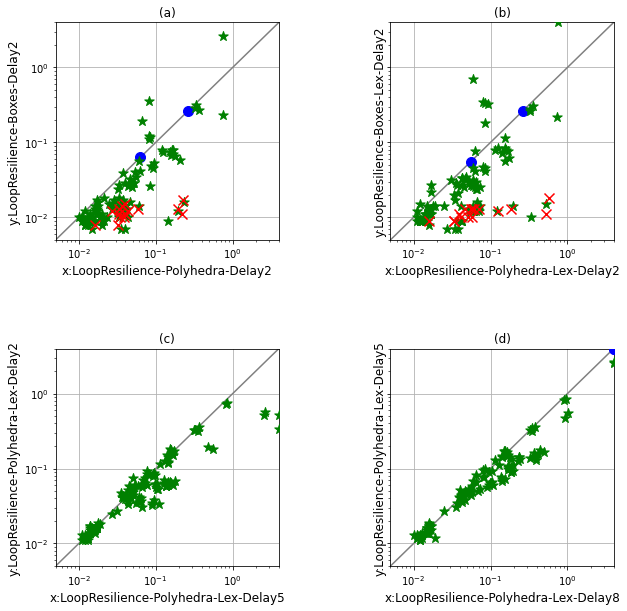

In [5]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
# Get all combinations of length 2 (or any length you want)
def cmp_dataframe(opt1,opt2):
    files = list(dict.fromkeys(df['filename']))
    # je veux comparer les options: j'ai chaque pair d'options, je réccup la valeur pour l'une et pour l'autre et je compare.
    # 
    cmp=pd.DataFrame(columns=['filename','option1','option2','precision','time1','time2'])
    grp=df.groupby(['options','filename']).max("time")
    for fname in files:
        q=f"filename=='{fname}'"
        grpquery= grp.query(q)
        q1 = f"options=='{opt1}'"
        q2 = f"options=='{opt2}'"             
        time1 = grpquery.query(q1)["time"].values[0]
        time2 = grpquery.query(q2)["time"].values[0]
        if (grpquery.query(q1)["result"].values[0] > grpquery.query(q2)["result"].values[0]):    
            tmp =pd.DataFrame([[fname,opt1,opt2,0,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        elif (grpquery.query(q1)["result"].values[0] == grpquery.query(q2)["result"].values[0]):    
            tmp =pd.DataFrame([[fname,opt1,opt2,1,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        else:
            tmp =pd.DataFrame([[fname,opt1,opt2,2,time2,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])

    return cmp
fig,axs = plt.subplots(2,2,sharey=True,figsize=(10,10))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
def print_plot(plt,cmp):
    # Plot
    L=len(cmp["filename"])
    #plt.fig(figsize=(10,10))
    # Plot points for category A
    x_min = 0.005
    x_max = 4
    y_min = 0.005
    y_max = 4
    
    epsilon = 0.0001
    
    s = 100
    category_a =  cmp.query("precision == 2")    
    x=category_a['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_a['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='blue', label='opt2 more precise than opt1', marker='o',zorder=10,s=s)

    
    category_c =  cmp.query("precision == 1")
    x=category_c['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_c['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='green', label='opt1=opt2', marker='*',zorder=10,s=s)

    # Plot points for category B
    
    
    category_b =  cmp.query("precision == 0")
    x=category_b['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_b['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y, color='red', label='opt1 more precise than opt2 ', marker='x',zorder=10,s=s)
    
    
    plt.set_yscale('log')
    plt.set_xscale('log')
    
    plt.set_xlim(x_min, x_max)
    plt.set_ylim(y_min, y_max)
    # Labels and legend
    
    
    #plt.legend()
    plt.grid(True)
    yx = np.linspace(0,5,100)  # Generates 100 points between 0 and 10
    # Show the plot
    
    l = plt.plot(yx,yx,color='gray')
    
print_plot(axs[0][0],cmp_dataframe("-domain polyhedra -refine -resilience",  "-domain boxes -refine -resilience"))
axs[0][0].title.set_text('(a)')
axs[0][0].set_xlabel('''x:LoopResilience-Polyhedra-Delay2''',fontsize=12)
axs[0][0].set_ylabel("y:LoopResilience-Boxes-Delay2",fontsize=12)
    
print_plot(axs[0][1],cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience"))
axs[0][1].title.set_text('(b)')
axs[0][1].set_xlabel('''x:LoopResilience-Polyhedra-Lex-Delay2''',fontsize=12)
axs[0][1].set_ylabel("y:LoopResilience-Boxes-Lex-Delay2",fontsize=12)


print_plot(axs[1][0],cmp_dataframe("-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience",  "-domain polyhedra -ordinals 3  -refine -resilience"))
axs[1][0].title.set_text('(c)')
axs[1][0].set_xlabel('x:LoopResilience-Polyhedra-Lex-Delay5',fontsize=12)
axs[1][0].set_ylabel("y:LoopResilience-Polyhedra-Lex-Delay2",fontsize=12)


print_plot(axs[1][1],cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience"))
axs[1][1].title.set_text('(d)')
axs[1][1].set_xlabel('x:LoopResilience-Polyhedra-Lex-Delay8',fontsize=12)
axs[1][1].set_ylabel("y:LoopResilience-Polyhedra-Lex-Delay5",fontsize=12)

fig.savefig('cmppolyhedraboxesmulti.svg')

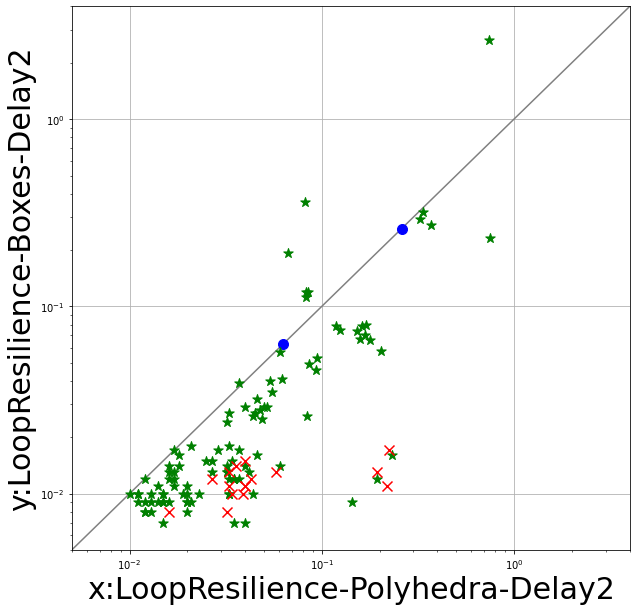

In [6]:
fig,axs = plt.subplots(1,1,sharey=True,figsize=(10,10))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axs.set_xlabel('''x:LoopResilience-Polyhedra-Delay2''',fontsize=30)
axs.set_ylabel("y:LoopResilience-Boxes-Delay2",fontsize=30)
print_plot(axs,cmp_dataframe("-domain polyhedra -refine -resilience",  "-domain boxes -refine -resilience"))
fig.savefig('cmppolyhedraboxesmultiA.svg')

In [12]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience").query("filename=='trm_svcomp_Lcm_false-termination-inputrand.c'")

,filename,option1,option2,precision,time1,time2
0,trm_svcomp_Lcm_false-termination-inputrand.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,2,75.968,75.968


In [14]:
# Compare polyhedra and boxes with ord 3
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 2")

,filename,option1,option2,precision,time1,time2
0,trm_svcomp_GCD2_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain boxes -ordinals 3 -refine -resilience,2,0.055,0.055
0,trm_svcomp_GCD_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain boxes -ordinals 3 -refine -resilience,2,0.266,0.266


In [11]:
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 0").shape[0]

16

In [15]:
# Compare polyhedra and boxes with ord 3 and widening delay 5
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 2")


,filename,option1,option2,precision,time1,time2
0,trm_svcomp_GCD2_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -ordinals 3 -refine -resilience,2,0.055,0.055
0,trm_svcomp_GCD_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -ordinals 3 -refine -resilience,2,0.266,0.266
0,trm_svcomp_Lcm_false-termination-inputrand.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -ordinals 3 -refine -resilience,2,0.011,0.011
0,trm_svcomp_Lcm_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -ordinals 3 -refine -resilience,2,0.010,0.010


In [13]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 0").shape[0]

15

In [15]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -joinbwd 8 -ordinals 3  -refine -resilience").query("precision == 2")

,filename,option1,option2,precision,time1,time2
0,trm_svcomp_GCD2_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.041,0.041
0,trm_svcomp_GCD_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.508,0.508
0,trm_svcomp_Lcm_false-termination-inputrand.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.008,0.008
0,trm_svcomp_Lcm_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.008,0.008


In [183]:
# Compare polyhedra with ord 3 and without
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -refine -resilience").query("precision == 1")

,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.010,0.011
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.121,0.023
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.142,0.022
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.125,0.022
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.147,0.023
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.054,0.043
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.046,0.045
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.055,0.060
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.020,0.019


In [179]:
# Compare polyhedra with ord 3 and with ord 3 + delay 5
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience").query("precision == 1")



,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.010,0.012
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.121,0.166
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.142,0.169
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.125,0.170
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.147,0.310
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.054,0.055
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.046,0.049
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.055,0.050
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.020,0.017


In [180]:
# Compare BOXES with ord 3 and  boxes with ord 3 + delay 5
cmp_dataframe("-domain boxes -ordinals 3  -refine -resilience","-domain boxes -joinbwd 5 -ordinals 3  -refine -resilience" ).query("precision == 1")

,filename,option1,option2,precision,time1,time2
0,toy.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.009,0.010
0,trm_svcomp_2Nested_false-termination-input.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.011,0.010
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.014,0.011
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.011,0.012
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.061,0.081
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.034,0.032
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.026,0.026
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.022,0.025
0,trm_svcomp_WhileNested_false-termination-input.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.012,0.015


In [17]:
# Compare polyhedra with ord 3 and with ord 3 + delay 5
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 8 -refine -resilience").query("precision == 1")


,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.022,0.024
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.079,0.459
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.075,0.400
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.071,0.397
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.072,0.470
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.070,0.062
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.053,0.051
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.059,0.054
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.016,0.017


In [182]:
# Compare polyhedra with ord 3 and with ord 3 + delay 8
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 8 -refine -resilience").query("precision == 1")


,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.010,0.011
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.121,0.227
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.142,0.230
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.125,0.227
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.147,0.354
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.054,0.049
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.046,0.047
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.055,0.080
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.020,0.013


In [16]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -refine -resilience","-domain polyhedra -ordinals 3  -refine -resilience").query("precision == 2")

,filename,option1,option2,precision,time1,time2
0,trm_svcomp_Lcm_false-termination-inputrand.c,-domain polyhedra -joinbwd 8 -refine -resilience,-domain polyhedra -ordinals 3 -refine -resili...,2,0.410,0.410
0,trm_svcomp_Lcm_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -refine -resilience,-domain polyhedra -ordinals 3 -refine -resili...,2,0.313,0.313
